# 6.4 REAL ESTATE TAIPEI

## CONTENTS:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis
5. Bonus: performance improvement after removing outliers¶

### 1. IMPORTING LIBRARIES AND DATA

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Ensuring that the graphs are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
# define path
path = r'C:\Users\Administrator\Documents\data analytics\Advanced Analytics and Dashbord Design\Exercise 6.4'

In [10]:
# read the real estate file (re)
re = pd.read_csv(os.path.join(path, 'real_estate.csv'))

### 2. DATA CLEANING

In [12]:
re.columns # list columns in the dataframe re

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [14]:
re.head(5) # check header data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [15]:
re.shape # check the nr of columns and rows in the file

(414, 8)

In [17]:
# Rename the columns in the same way as in Exercise 6.2.

re.rename(columns = {'X1 transaction date' : 'Date', 'X2 house age': 'House age', 'X3 distance to the nearest MRT station': 'D. metro', 'X4 number of convenience stores': 'N. shops', 'Y house price of unit area': 'Price per unit', 'X5 latitude' : 'Latitude', 'X6 longitude' : 'Longitude' }, inplace = True)

In [19]:
re.columns # list columns in the dataframe re to check if the renaming worked

Index(['No', 'Date', 'House age', 'D. metro', 'N. shops', 'Latitude',
       'Longitude', 'Price per unit'],
      dtype='object')

### 3. Data prep for regression analysis

In [23]:
# Check for missing values

re.isnull().sum()

# No missing values to handle

No                0
Date              0
House age         0
D. metro          0
N. shops          0
Latitude          0
Longitude         0
Price per unit    0
dtype: int64

In [24]:
# Duplicates check

In [25]:
dups = re.duplicated() # Check for duplicates

In [27]:
dups.shape 
# no dups

(414,)

In [ ]:
# Extreme values check

In [30]:
sns.histplot(re['Price per unit'], bins=25, kde=True) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

<Axes: xlabel='Price per unit', ylabel='Density'>

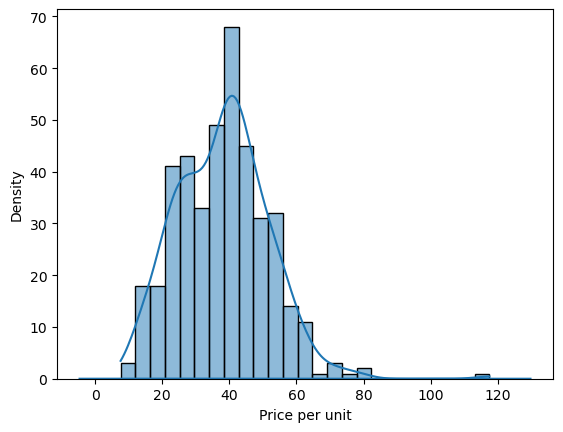

In [31]:
plt.show() # show the plot

In [32]:
re['Price per unit'].mean() # Check the mean

37.980193236714975

In [33]:
re['Price per unit'].median() # Check the median

38.45

In [34]:
re['Price per unit'].max() # Check the max

117.5

In [35]:
# DATA PREPARATION FOR REGRESSION ANALYSIS

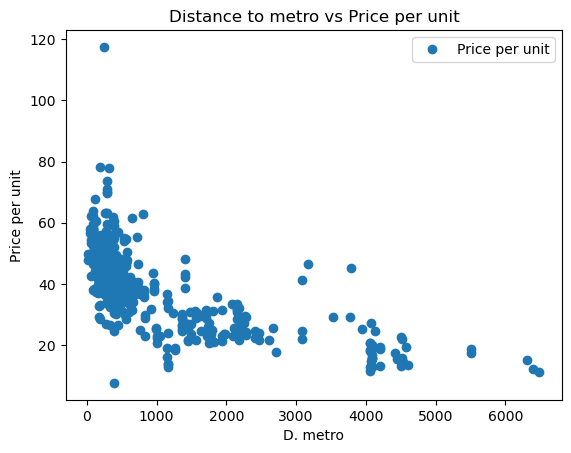

In [37]:
# Scatterplot using matplotlib for another look at how the chosen variables plot against each other.

re.plot(x = 'D. metro', y='Price per unit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Distance to metro vs Price per unit')  
plt.xlabel('D. metro')  
plt.ylabel('Price per unit')  
plt.show()

In [39]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = re['D. metro'].values.reshape(-1,1)
y = re['Price per unit'].values.reshape(-1,1)

In [41]:
X # list x points

array([[  84.87882],
       [ 306.5947 ],
       [ 561.9845 ],
       [ 561.9845 ],
       [ 390.5684 ],
       [2175.03   ],
       [ 623.4731 ],
       [ 287.6025 ],
       [5512.038  ],
       [1783.18   ],
       [ 405.2134 ],
       [  90.45606],
       [ 492.2313 ],
       [2469.645  ],
       [1164.838  ],
       [ 579.2083 ],
       [ 292.9978 ],
       [ 350.8515 ],
       [ 368.1363 ],
       [  23.38284],
       [2275.877  ],
       [ 279.1726 ],
       [1360.139  ],
       [ 279.1726 ],
       [ 480.6977 ],
       [1487.868  ],
       [ 383.8624 ],
       [ 276.449  ],
       [ 557.478  ],
       [ 451.2438 ],
       [4519.69   ],
       [ 769.4034 ],
       [ 488.5727 ],
       [ 323.655  ],
       [ 205.367  ],
       [4079.418  ],
       [1935.009  ],
       [1360.139  ],
       [ 577.9615 ],
       [ 289.3248 ],
       [4082.015  ],
       [4066.587  ],
       [ 519.4617 ],
       [ 512.7871 ],
       [ 533.4762 ],
       [ 488.8193 ],
       [ 463.9623 ],
       [ 640.

In [42]:
y # list y points

array([[ 37.9],
       [ 42.2],
       [ 47.3],
       [ 54.8],
       [ 43.1],
       [ 32.1],
       [ 40.3],
       [ 46.7],
       [ 18.8],
       [ 22.1],
       [ 41.4],
       [ 58.1],
       [ 39.3],
       [ 23.8],
       [ 34.3],
       [ 50.5],
       [ 70.1],
       [ 37.4],
       [ 42.3],
       [ 47.7],
       [ 29.3],
       [ 51.6],
       [ 24.6],
       [ 47.9],
       [ 38.8],
       [ 27. ],
       [ 56.2],
       [ 33.6],
       [ 47. ],
       [ 57.1],
       [ 22.1],
       [ 25. ],
       [ 34.2],
       [ 49.3],
       [ 55.1],
       [ 27.3],
       [ 22.9],
       [ 25.3],
       [ 47.7],
       [ 46.2],
       [ 15.9],
       [ 18.2],
       [ 34.7],
       [ 34.1],
       [ 53.9],
       [ 38.3],
       [ 42. ],
       [ 61.5],
       [ 13.4],
       [ 13.2],
       [ 44.2],
       [ 20.7],
       [ 27. ],
       [ 38.9],
       [ 51.7],
       [ 13.7],
       [ 41.9],
       [ 53.5],
       [ 22.6],
       [ 42.4],
       [ 21.3],
       [ 63.2],
       [

In [43]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. REGRESSION ANALYSIS

In [45]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [46]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

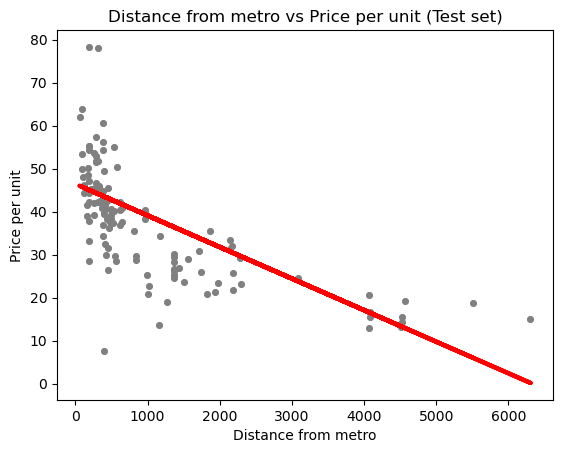

In [50]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Test set)')
plot_test.xlabel('Distance from metro')
plot_test.ylabel('Price per unit')
plot_test.show()


In [51]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [52]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00733387]]
Mean squared error:  94.83699358134518
R2 score:  0.44352398177065955


In [54]:
y_predicted # list predicted y-values

array([[44.89433915],
       [13.23961319],
       [44.0619849 ],
       [13.29826212],
       [45.1984526 ],
       [42.86012992],
       [45.19294633],
       [43.47328443],
       [44.39765084],
       [43.58068891],
       [44.60697113],
       [43.98049611],
       [45.07009527],
       [45.28920993],
       [44.54074851],
       [41.92446716],
       [42.82465087],
       [45.08514949],
       [42.83510677],
       [45.0513433 ],
       [45.78167276],
       [36.46998752],
       [39.01335777],
       [44.32319596],
       [43.13570362],
       [43.6341374 ],
       [43.13278401],
       [33.71644332],
       [43.58068891],
       [23.85756318],
       [44.15032573],
       [40.30131455],
       [44.43548039],
       [42.19722906],
       [43.13278401],
       [36.46998752],
       [45.55234173],
       [35.00550237],
       [43.66144138],
       [ 0.19658087],
       [43.95912009],
       [42.39356547],
       [35.46103816],
       [45.63873981],
       [16.50811216],
       [43

In [55]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,45.3,44.894339
1,14.4,13.239613
2,46.0,44.061985
3,15.6,13.298262
4,50.2,45.198453
5,38.1,42.860130
6,48.5,45.192946
7,41.4,43.473284
8,51.6,44.397651
9,40.1,43.580689


In [56]:
# Compare how the regression fits the training set

In [57]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [59]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [63]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

# Slope, how y changes when x changes (price vs. distance from metro), neg relationship.
# Mean squared error, mse: The larger the distance the farther away the data is from the regression points (less accurate).
# R2 score - how well the model explains the variance in the data. 45 % means that the model is not a good fit. 

Slope: [[-0.00733387]]
Mean squared error:  103.89485558919945
R2 score:  0.4544671972735639


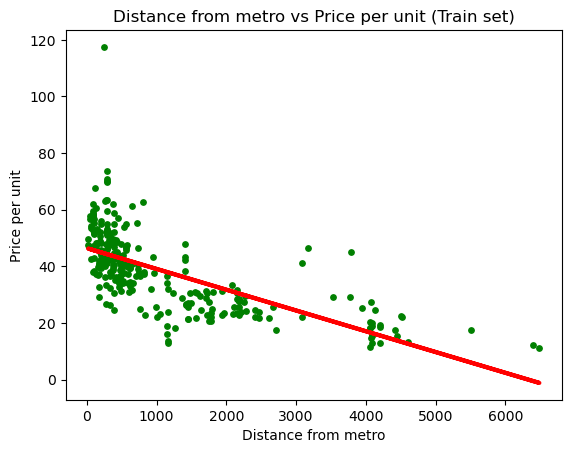

In [64]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Train set)')
plot_test.xlabel('Distance from metro')
plot_test.ylabel('Price per unit')
plot_test.show()

In [65]:
# REMOVE OUTLIERS TO ACHIEVE PERFORMANCE IMPROVEMENT

In [66]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

re_test = re[re['Price per unit'] <=100] 

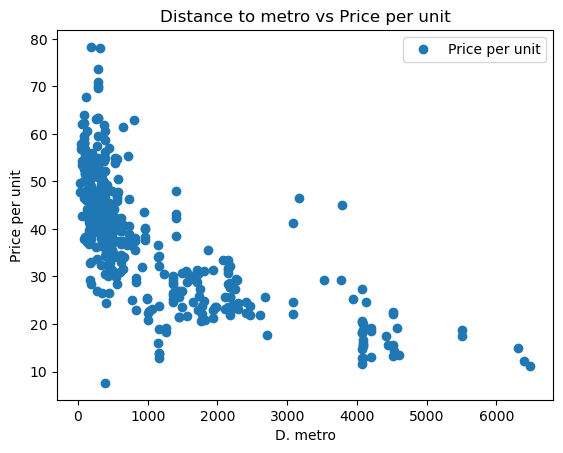

In [68]:
# See how the scatterplot looks without outliers.

re_test.plot(x = 'D. metro', y='Price per unit', style='o')  
plt.title('Distance to metro vs Price per unit')  
plt.xlabel('D. metro')  
plt.ylabel('Price per unit')  
plt.show()

In [70]:
# Reshape again.

X_2 =re_test['D. metro'].values.reshape(-1,1)
y_2 = re_test['Price per unit'].values.reshape(-1,1)

In [71]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0) # split the sets

In [72]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [73]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [74]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [75]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.007133]]
Mean squared error:  83.20842318051459
R2 score:  0.49308220799008595


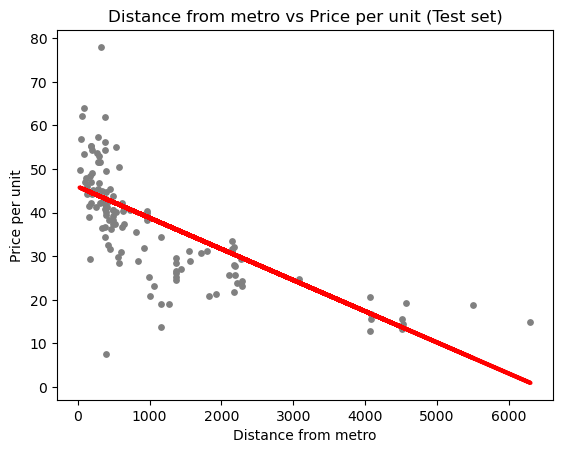

In [76]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Test set)')
plot_test.xlabel('Distance from metro')
plot_test.ylabel('Price per unit')
plot_test.show()

In [78]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()}) # Actual vs. predicted values. 
data.head(30)

,Actual,Predicted
0,56.8,45.571079
1,14.4,13.629338
2,33.4,30.608087
3,15.6,13.686380
4,30.9,41.639376
5,31.9,39.372686
6,48.5,44.707487
7,41.4,43.034926
8,51.6,43.933974
9,28.8,39.949834


### ANALYSIS

- The model is not a good fit due to the Slope: [[-0.00733387]], Mean squared error:  94.83699358134518, R2 score:  0.44352398177065955.
- The MSE should be as close to 0 as possible, and the R2 score is only a 45 out of 100 % fit. This is not good enough.
- Removing outliers does not result in a good result either. Slope: [[-0.007133]], Mean squared error:  83.20842318051459, R2 score:  0.49308220799008595.
- This is not a good model for predicting if house prices are determined or significantly influenced by proximity to a metro station. 
- This is a too simple analyis. House prices can also be determined by other factors such as square metres of apartment/living space, garden, services in the area,
state of apartment/house (new vs. old, renovated etc.). It is a too one-sided analysis to only look at proximity to metro station, and this is probably why this model
is not a good fit for this analysis. We need to brin in more factors!

Possible bias can occur if the sample is too small, like in this example. It is important to have a big enough sample in order to receive as many data points as possible
to include in the analysis. It is also not sure that removing outliers is always good. This can be avoided by understanding the data.